In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Load CSVs into DataFrames and create SQLite database
UNRATE = pd.read_csv('UNRATE.csv')
CPI = pd.read_csv('CPIAUCSL_CH1.csv')
FEDFUNDS = pd.read_csv('FEDFUNDS.csv')
GDP = pd.read_csv('GDPC1_CH1.csv')
CUNRATE = pd.read_csv('CGBD2534.csv')

conn = sqlite3.connect('database.db')
UNRATE.to_sql('UNRATE', conn, if_exists='replace', index=False)
CPI.to_sql('CPI', conn, if_exists='replace', index=False)
FEDFUNDS.to_sql('FEDFUNDS', conn, if_exists='replace', index=False)
GDP.to_sql('GDP', conn, if_exists='replace', index=False)
CUNRATE.to_sql('CUNRATE', conn, if_exists='replace', index=False)

311

## 1. Basic SELECT Statement - Practice Problems

In [3]:
# Problem 1a: Select all columns from the CPI table
query = """
SELECT * FROM CPI
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,CPIAUCSL_CH1
0,1948-01-01,2.20
1,1948-02-01,2.05
2,1948-03-01,1.50
3,1948-04-01,1.82
4,1948-05-01,2.06


In [4]:
# Problem 1b: Select all columns from the GDP table
query = """
SELECT * FROM GDP
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,GDPC1_CH1
0,1948-01-01,57.001
1,1948-04-01,99.798
2,1948-07-01,117.338
3,1948-10-01,85.912
4,1949-01-01,21.125


## 2. SELECT Specific Columns - Practice Problems

In [5]:
# Problem 2a: Select only the observation_date and FEDFUNDS columns from the FEDFUNDS table
query = """
SELECT observation_date, FEDFUNDS FROM FEDFUNDS
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [6]:
# Problem 2b: Select only the observation_date and CPIAUCSL_CH1 columns from the CPI table
query = """
SELECT observation_date, CPIAUCSL_CH1 FROM CPI
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,CPIAUCSL_CH1
0,1948-01-01,2.20
1,1948-02-01,2.05
2,1948-03-01,1.50
3,1948-04-01,1.82
4,1948-05-01,2.06


## 3. WHERE Clause - Practice Problems

In [7]:
# Problem 3a: Select dates when the Federal Funds rate is greater than 2
query = """ 
SELECT observation_date, FEDFUNDS 
FROM FEDFUNDS 
WHERE FEDFUNDS > 2 
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,FEDFUNDS
0,1955-09-01,2.18
1,1955-10-01,2.24
2,1955-11-01,2.35
3,1955-12-01,2.48
4,1956-01-01,2.45


In [8]:
# Problem 3b: Select dates when the unemployment rate is less than 5%
query = """
SELECT observation_date, UNRATE 
FROM UNRATE 
WHERE UNRATE < 5.0
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [9]:
# Problem 3c: Select dates when GDP growth is NOT NULL
query = """
SELECT observation_date, GDPC1_CH1 
FROM GDP 
WHERE GDPC1_CH1 IS NOT NULL
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,GDPC1_CH1
0,1948-01-01,57.001
1,1948-04-01,99.798
2,1948-07-01,117.338
3,1948-10-01,85.912
4,1949-01-01,21.125


In [10]:
# Problem 3d: Select dates when unemployment rate is less than 6% AND Federal Funds rate is greater than 4%
query = """
SELECT U.observation_date, U.UNRATE, F.FEDFUNDS
FROM UNRATE U
JOIN FEDFUNDS F ON U.observation_date = F.observation_date
WHERE U.UNRATE < 6.0 AND F.FEDFUNDS > 4.0
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,UNRATE,FEDFUNDS
0,1965-03-01,4.7,4.05
1,1965-04-01,4.8,4.09
2,1965-05-01,4.6,4.10
3,1965-06-01,4.6,4.05
4,1965-07-01,4.4,4.09


## 4. ORDER BY - Practice Problems

In [11]:
# Problem 4a: Sort Federal Funds rates from lowest to highest
query = """
SELECT observation_date, FEDFUNDS 
FROM FEDFUNDS 
ORDER BY FEDFUNDS ASC
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,observation_date,FEDFUNDS
0,2020-04-01,0.05
1,2020-05-01,0.05
2,2021-05-01,0.06
3,2011-07-01,0.07
4,2011-10-01,0.07
5,2011-12-01,0.07
6,2014-01-01,0.07
7,2014-02-01,0.07
8,2021-03-01,0.07
9,2021-04-01,0.07


In [12]:
# Problem 4b: Sort college unemployment rates from highest to lowest
query = """
SELECT observation_date, CGBD2534 
FROM CUNRATE 
ORDER BY CGBD2534 DESC
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,observation_date,CGBD2534
0,2020-07-01,10.6
1,2020-04-01,10.2
2,2020-05-01,9.6
3,2020-06-01,9.5
4,2020-08-01,8.0
5,2020-09-01,6.3
6,2010-07-01,6.2
7,2009-06-01,5.9
8,2009-05-01,5.8
9,2009-07-01,5.8


## 5. LIMIT - Practice Problems

In [13]:
# Problem 5a: Get the first 10 records from the GDP table
query = """
SELECT observation_date, GDPC1_CH1 
FROM GDP 
LIMIT 10
"""
result = pd.read_sql_query(query, conn)
result

,observation_date,GDPC1_CH1
0,1948-01-01,57.001
1,1948-04-01,99.798
2,1948-07-01,117.338
3,1948-10-01,85.912
4,1949-01-01,21.125
5,1949-04-01,-23.562
6,1949-07-01,-13.346
7,1949-10-01,-35.012
8,1950-01-01,85.297
9,1950-04-01,164.554


In [14]:
# Problem 5b: Get the top 5 highest unemployment rates
query = """
SELECT observation_date, UNRATE 
FROM UNRATE 
ORDER BY UNRATE DESC
LIMIT 5
"""
result = pd.read_sql_query(query, conn)
result

,observation_date,UNRATE
0,2020-04-01,14.8
1,2020-05-01,13.2
2,2020-06-01,11.0
3,1982-11-01,10.8
4,1982-12-01,10.8


## 6. BETWEEN - Practice Problems

In [15]:
# Problem 6a: Find Federal Funds rates between 3% and 5%
query = """
SELECT observation_date, FEDFUNDS 
FROM FEDFUNDS 
WHERE FEDFUNDS BETWEEN 3.0 AND 5.0
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,FEDFUNDS
0,1957-02-01,3.00
1,1957-04-01,3.00
2,1957-05-01,3.00
3,1957-06-01,3.00
4,1957-08-01,3.24


In [16]:
# Problem 6b: Find college unemployment rates between 4% and 6%
query = """
SELECT observation_date, CGBD2534 
FROM CUNRATE 
WHERE CGBD2534 BETWEEN 4.0 AND 6.0
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,CGBD2534
0,2001-12-01,4.0
1,2009-01-01,4.1
2,2009-02-01,4.5
3,2009-03-01,4.7
4,2009-04-01,4.8


## 7. INNER JOIN - Practice Problems

In [17]:
# Problem 7a: Select dates where the Federal Funds rate is greater than 5.0 along with the corresponding unemployment rates
query = """
SELECT U.observation_date, U.UNRATE, F.FEDFUNDS
FROM UNRATE U
INNER JOIN FEDFUNDS F ON U.observation_date = F.observation_date
WHERE F.FEDFUNDS > 5.0
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,UNRATE,FEDFUNDS
0,1966-06-01,3.8,5.17
1,1966-07-01,3.8,5.30
2,1966-08-01,3.8,5.53
3,1966-09-01,3.7,5.40
4,1966-10-01,3.7,5.53


In [18]:
# Problem 7b: Join UNRATE and CPI tables to show unemployment rate and CPI change together
query = """
SELECT U.observation_date, U.UNRATE, C.CPIAUCSL_CH1
FROM UNRATE U
INNER JOIN CPI C ON U.observation_date = C.observation_date
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,UNRATE,CPIAUCSL_CH1
0,1948-01-01,3.4,2.20
1,1948-02-01,3.8,2.05
2,1948-03-01,4.0,1.50
3,1948-04-01,3.9,1.82
4,1948-05-01,3.5,2.06


In [19]:
# Problem 7c: Show dates where the college unemployment rate is higher than the overall unemployment rate
query = """ 
SELECT U.observation_date, U.UNRATE, C.CGBD2534 
FROM UNRATE U
INNER JOIN CUNRATE C ON U.observation_date = C.observation_date 
WHERE C.CGBD2534 > U.UNRATE 
"""
result = pd.read_sql_query(query, conn)
result.head()

,observation_date,UNRATE,CGBD2534
0,2020-07-01,10.2,10.6


## 8. LEFT JOIN - Practice Problems

In [20]:
# Problem 8a: Left join FEDFUNDS with GDP data
query = """
SELECT F.observation_date, F.FEDFUNDS, G.GDPC1_CH1 
FROM FEDFUNDS F
LEFT JOIN GDP G ON F.observation_date = G.observation_date
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,observation_date,FEDFUNDS,GDPC1_CH1
0,1954-07-01,0.80,-22.303
1,1954-08-01,1.22,NaN
2,1954-09-01,1.07,NaN
3,1954-10-01,0.85,78.007
4,1954-11-01,0.83,NaN
5,1954-12-01,1.28,NaN
6,1955-01-01,1.39,175.554
7,1955-02-01,1.29,NaN
8,1955-03-01,1.35,NaN
9,1955-04-01,1.43,221.605


In [21]:
# Problem 8b: Left join CPI with CUNRATE to keep all CPI records
query = """
SELECT C.observation_date, C.CPIAUCSL_CH1, U.CGBD2534 
FROM CPI C
LEFT JOIN CUNRATE U ON C.observation_date = U.observation_date
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,observation_date,CPIAUCSL_CH1,CGBD2534
0,1948-01-01,2.20,NaN
1,1948-02-01,2.05,NaN
2,1948-03-01,1.50,NaN
3,1948-04-01,1.82,NaN
4,1948-05-01,2.06,NaN
5,1948-06-01,2.07,NaN
6,1948-07-01,2.17,NaN
7,1948-08-01,2.03,NaN
8,1948-09-01,1.52,NaN
9,1948-10-01,1.40,NaN


## 9. Aggregate Functions - Practice Problems

In [22]:
# Problem 9a: Calculate statistics on Federal Funds rate
query = """
SELECT 
    COUNT(*) as total_records,
    AVG(FEDFUNDS) as average_rate,
    MIN(FEDFUNDS) as min_rate,
    MAX(FEDFUNDS) as max_rate
FROM FEDFUNDS
"""
result = pd.read_sql_query(query, conn)
result

,total_records,average_rate,min_rate,max_rate
0,858,4.6038,0.05,19.1


In [23]:
# Problem 9b: Calculate the sum of all GDP changes and count how many are positive
query = """
SELECT 
    COUNT(*) as total_observations,
    SUM(GDPC1_CH1) as total_gdp_change,
    AVG(GDPC1_CH1) as avg_gdp_change,
    COUNT(CASE WHEN GDPC1_CH1 > 0 THEN 1 END) as positive_growth_periods
FROM GDP
WHERE GDPC1_CH1 IS NOT NULL
"""
result = pd.read_sql_query(query, conn)
result

,total_observations,total_gdp_change,avg_gdp_change,positive_growth_periods
0,311,86192.228,277.145428,278


## 10. GROUP BY - Practice Problems

In [24]:
# Problem 10a: Calculate average unemployment rate by year
query = """
SELECT 
    SUBSTR(observation_date, 1, 4) as year,
    AVG(UNRATE) as avg_unemployment,
    COUNT(*) as num_observations
FROM UNRATE
GROUP BY year
ORDER BY year DESC
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,year,avg_unemployment,num_observations
0,2025,4.230000,11
1,2024,4.033333,12
2,2023,3.633333,12
3,2022,3.641667,12
4,2021,5.358333,12
5,2020,8.100000,12
6,2019,3.675000,12
7,2018,3.891667,12
8,2017,4.358333,12
9,2016,4.875000,12


In [25]:
# Problem 10b: Calculate average GDP growth by year, only including positive growth periods
query = """
SELECT 
    SUBSTR(observation_date, 1, 4) as year,
    AVG(GDPC1_CH1) as avg_gdp_growth,
    MIN(GDPC1_CH1) as min_growth,
    MAX(GDPC1_CH1) as max_growth
FROM GDP
WHERE GDPC1_CH1 > 0
GROUP BY year
ORDER BY year DESC
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,year,avg_gdp_growth,min_growth,max_growth
0,2025,498.98200,466.091,546.387
1,2024,634.71600,552.762,706.009
2,2023,647.78750,506.897,755.435
3,2022,543.52425,289.608,850.576
4,2021,1247.90700,372.922,2362.937
5,2020,277.57100,277.571,277.571
6,2019,521.77625,387.564,680.574
7,2018,581.79275,422.522,645.734
8,2017,470.43025,396.653,578.000
9,2016,342.05025,280.466,412.146


In [26]:
#Problem 10c: Calculate the average fedFunds rate by Month
query = """
SELECT 
    SUBSTR(observation_date, 6, 2) as month,
    AVG(FEDFUNDS) as avg_fedfunds,
    COUNT(*) as num_observations
FROM FEDFUNDS
GROUP BY month  
"""
result = pd.read_sql_query(query, conn)
result

,month,avg_fedfunds,num_observations
0,01,4.551268,71
1,02,4.510282,71
2,03,4.532535,71
3,04,4.593099,71
4,05,4.611408,71
5,06,4.670563,71
6,07,4.636250,72
7,08,4.667361,72
8,09,4.662222,72
9,10,4.628472,72


## 11. NTILE Function - Practice Problems

In [27]:
# Problem 11a: Categorize Federal Funds rates into quartiles
query = """ 
SELECT 
    observation_date, 
    FEDFUNDS as rate,
    NTILE(4) OVER (ORDER BY FEDFUNDS) as quartile
FROM FEDFUNDS
WHERE FEDFUNDS IS NOT NULL
ORDER BY FEDFUNDS
"""
result = pd.read_sql_query(query, conn)
result.head(10)

,observation_date,rate,quartile
0,2020-04-01,0.05,1
1,2020-05-01,0.05,1
2,2021-05-01,0.06,1
3,2011-07-01,0.07,1
4,2011-10-01,0.07,1
5,2011-12-01,0.07,1
6,2014-01-01,0.07,1
7,2014-02-01,0.07,1
8,2021-03-01,0.07,1
9,2021-04-01,0.07,1


In [28]:
# Problem 11b: Categorize college unemployment rates into deciles (10 groups)
query = """ 
SELECT 
    observation_date, 
    CGBD2534 as college_unemp_rate,
    NTILE(10) OVER (ORDER BY CGBD2534) as decile
FROM CUNRATE
WHERE CGBD2534 IS NOT NULL
ORDER BY observation_date
"""
result = pd.read_sql_query(query, conn)
result.head(20)

,observation_date,college_unemp_rate,decile
0,2000-01-01,2.1,1
1,2000-02-01,1.4,1
2,2000-03-01,1.6,1
3,2000-04-01,1.5,1
4,2000-05-01,1.9,1
5,2000-06-01,2.0,1
6,2000-07-01,2.1,1
7,2000-08-01,2.2,2
8,2000-09-01,2.0,1
9,2000-10-01,1.5,1


In [29]:
# Problem 11c: Categorize CPI changes into terciles (3 groups) and order by date
query = """ 
SELECT 
    observation_date, 
    CPIAUCSL_CH1 as cpi_change,
    NTILE(3) OVER (ORDER BY CPIAUCSL_CH1) as tercile
FROM CPI
WHERE CPIAUCSL_CH1 IS NOT NULL
ORDER BY observation_date
"""
result = pd.read_sql_query(query, conn)
result.head(20)

,observation_date,cpi_change,tercile
0,1948-01-01,2.20,2
1,1948-02-01,2.05,2
2,1948-03-01,1.50,1
3,1948-04-01,1.82,1
4,1948-05-01,2.06,2
5,1948-06-01,2.07,2
6,1948-07-01,2.17,2
7,1948-08-01,2.03,2
8,1948-09-01,1.52,1
9,1948-10-01,1.40,1


## Challenge Problems - Combining Multiple Concepts

In [30]:
# Challenge 1: Find years where average unemployment was above 7%, show avg unemployment and fed funds rate
query = """
SELECT 
    SUBSTR(U.observation_date, 1, 4) as year,
    AVG(U.UNRATE) as avg_unemployment,
    AVG(F.FEDFUNDS) as avg_fed_funds
FROM UNRATE U
INNER JOIN FEDFUNDS F ON U.observation_date = F.observation_date
GROUP BY year
HAVING AVG(U.UNRATE) > 7.0
ORDER BY year DESC
"""
result = pd.read_sql_query(query, conn)
result

,year,avg_unemployment,avg_fed_funds
0,2020,8.100000,0.375833
1,2013,7.358333,0.107500
2,2012,8.075000,0.140000
3,2011,8.933333,0.101667
4,2010,9.608333,0.175000
5,2009,9.283333,0.160000
6,1992,7.491667,3.521667
7,1985,7.191667,8.100833
8,1984,7.508333,10.225000
9,1983,9.600000,9.086667


In [31]:
# Challenge 2: Find the top 10 months with the biggest gap between college and overall unemployment
query = """
SELECT 
    U.observation_date,
    U.UNRATE as overall_unemployment,
    C.CGBD2534 as college_unemployment,
    (C.CGBD2534 - U.UNRATE) as gap
FROM UNRATE U
INNER JOIN CUNRATE C ON U.observation_date = C.observation_date
WHERE C.CGBD2534 IS NOT NULL AND U.UNRATE IS NOT NULL
ORDER BY gap DESC
LIMIT 10
"""
result = pd.read_sql_query(query, conn)
result

,observation_date,overall_unemployment,college_unemployment,gap
0,2020-07-01,10.2,10.6,0.4
1,2024-07-01,4.2,4.2,0.0
2,2024-08-01,4.2,4.0,-0.2
3,2024-06-01,4.1,3.7,-0.4
4,2023-01-01,3.5,3.1,-0.4
5,2023-07-01,3.5,3.1,-0.4
6,2020-08-01,8.4,8.0,-0.4
7,2025-07-01,4.2,3.8,-0.4
8,2025-02-01,4.1,3.6,-0.5
9,2022-07-01,3.5,2.9,-0.6


In [32]:
# Challenge 3: Create a summary showing how often the Fed Funds rate falls into each quartile by year 
# (You can Use two seperate Queries if needed)
query = """
WITH quartile_data AS (
    SELECT 
        SUBSTR(observation_date, 1, 4) as year,
        NTILE(4) OVER (ORDER BY FEDFUNDS) as quartile
    FROM FEDFUNDS
    WHERE FEDFUNDS IS NOT NULL
)
SELECT 
    year,
    COUNT(CASE WHEN quartile = 1 THEN 1 END) as Q1_count,
    COUNT(CASE WHEN quartile = 2 THEN 1 END) as Q2_count,
    COUNT(CASE WHEN quartile = 3 THEN 1 END) as Q3_count,
    COUNT(CASE WHEN quartile = 4 THEN 1 END) as Q4_count
FROM quartile_data
GROUP BY year
ORDER BY year DESC
LIMIT 15
"""
result = pd.read_sql_query(query, conn)
result

,year,Q1_count,Q2_count,Q3_count,Q4_count
0,2025,0,4,8,0
1,2024,0,0,12,0
2,2023,0,1,11,0
3,2022,7,5,0,0
4,2021,12,0,0,0
5,2020,12,0,0,0
6,2019,3,9,0,0
7,2018,7,5,0,0
8,2017,12,0,0,0
9,2016,12,0,0,0


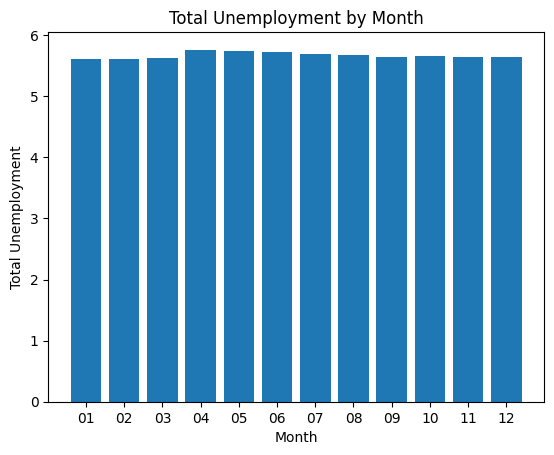

In [33]:
#Challenge 4: Calculate total Unemployment in each of the months, save it as a dataframe, 
# then make a Bar Graph chart (Using MATPLOTLIB) Showing the percent of total GDP change contributed by each quarter
query = """
SELECT
    SUBSTR(observation_date, 6, 2) as month,
    AVG(UNRATE) as total_unemployment
FROM UNRATE
GROUP BY month
"""
result = pd.read_sql_query(query, conn)
result
plt.bar(result['month'], result['total_unemployment'])
plt.xlabel('Month')
plt.ylabel('Total Unemployment')
plt.title('Total Unemployment by Month')
plt.show()



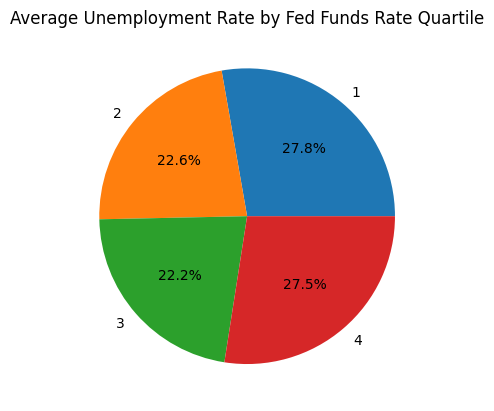

In [37]:
#Challenge 5: Group the FEDFUNDS By quartile, then show the UNRATE change for 
# each quartile as a Pie Chart (You can use Two Queries if needed)
query = """
SELECT
    F.quartile,
    AVG(U.UNRATE) as avg_unrate
FROM (  
    SELECT 
        observation_date, 
        FEDFUNDS,
        NTILE(4) OVER (ORDER BY FEDFUNDS) as quartile
    FROM FEDFUNDS
    WHERE FEDFUNDS IS NOT NULL
) F
JOIN UNRATE U ON F.observation_date = U.observation_date
WHERE U.UNRATE IS NOT NULL
GROUP BY F.quartile
"""
result = pd.read_sql_query(query, conn)
result = result.sort_values('quartile')
plt.pie(result['avg_unrate'], labels=result['quartile'].astype(str), autopct='%1.1f%%')
plt.title('Average Unemployment Rate by Fed Funds Rate Quartile')
plt.show()